**<center><font size = "5">How to Use Machine Learning to Inform Design Decisions and Make Predictions<center>**
<center><font size = "4">An Introductory Guide and Use Case for Applied Data Science<center>
    
***
<center><font size = "2">Prepared by: Kurt Klingensmith<center>

***

# Notebook Setup

## Libraries

In [1]:
# Data handling:
import pandas as pd

# Data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display Configuration:
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset:
auto_mpg = fetch_ucirepo(id=9)

# Data (as pandas dataframes):
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Make into pandas dataframe:
mpg = pd.concat([X, y], axis=1)

# Fill NaNs with mean:
mpg = mpg.fillna(mpg.mean())

mpg.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [3]:
mpg.shape

(398, 8)

## Data Prep:

In [4]:
# Add the "Gas Guzzler" column based on the criteria:
mpg['mpg'] = mpg['mpg'].apply(lambda x: 1 if x < 21 else 0)
mpg = mpg.rename(columns={'mpg': 'gas_guzzler_tax'})
mpg.head(5)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,gas_guzzler_tax
0,307.0,8,130.0,3504,12.0,70,1,1
1,350.0,8,165.0,3693,11.5,70,1,1
2,318.0,8,150.0,3436,11.0,70,1,1
3,304.0,8,150.0,3433,12.0,70,1,1
4,302.0,8,140.0,3449,10.5,70,1,1


In [5]:
# Count of Gas Guzzlers (1) and non-Gas Guzzlers (0):
mpg.gas_guzzler_tax.value_counts()

0    227
1    171
Name: gas_guzzler_tax, dtype: int64

# Conduct EDA

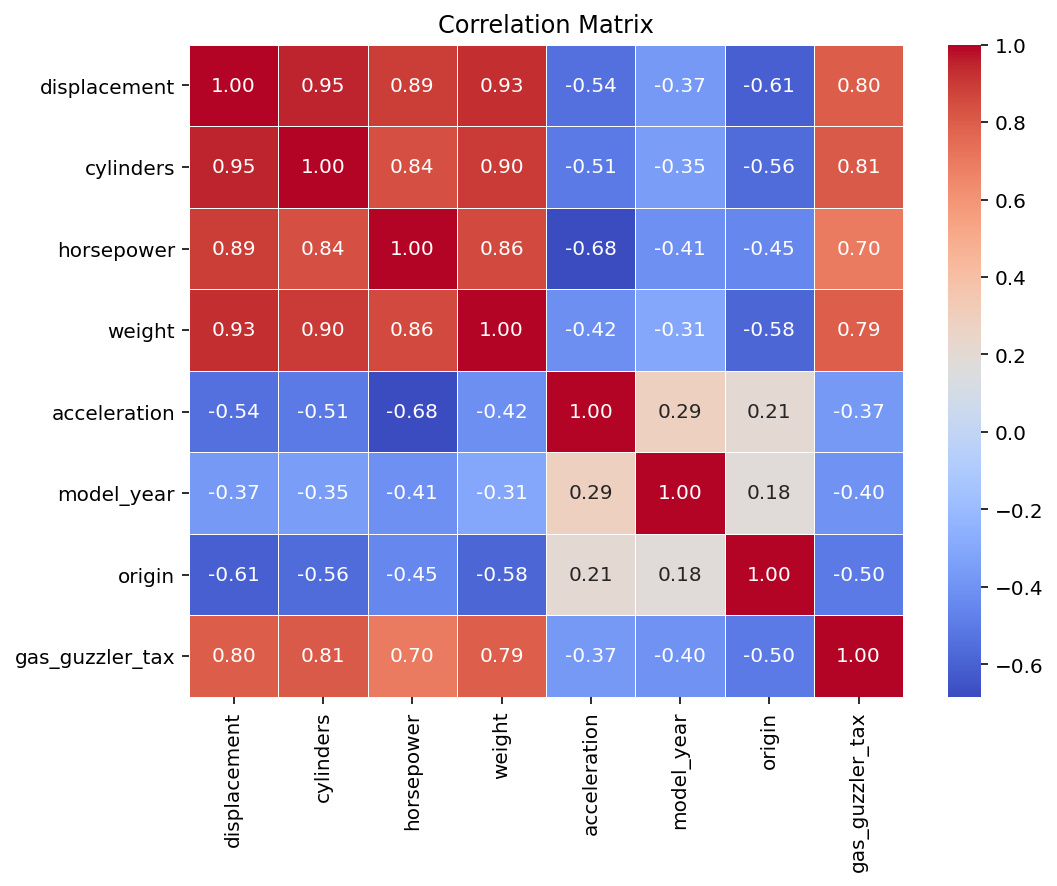

In [6]:
# Plot a correlation matrix:
plt.figure(figsize=(8, 6))
sns.heatmap(mpg.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

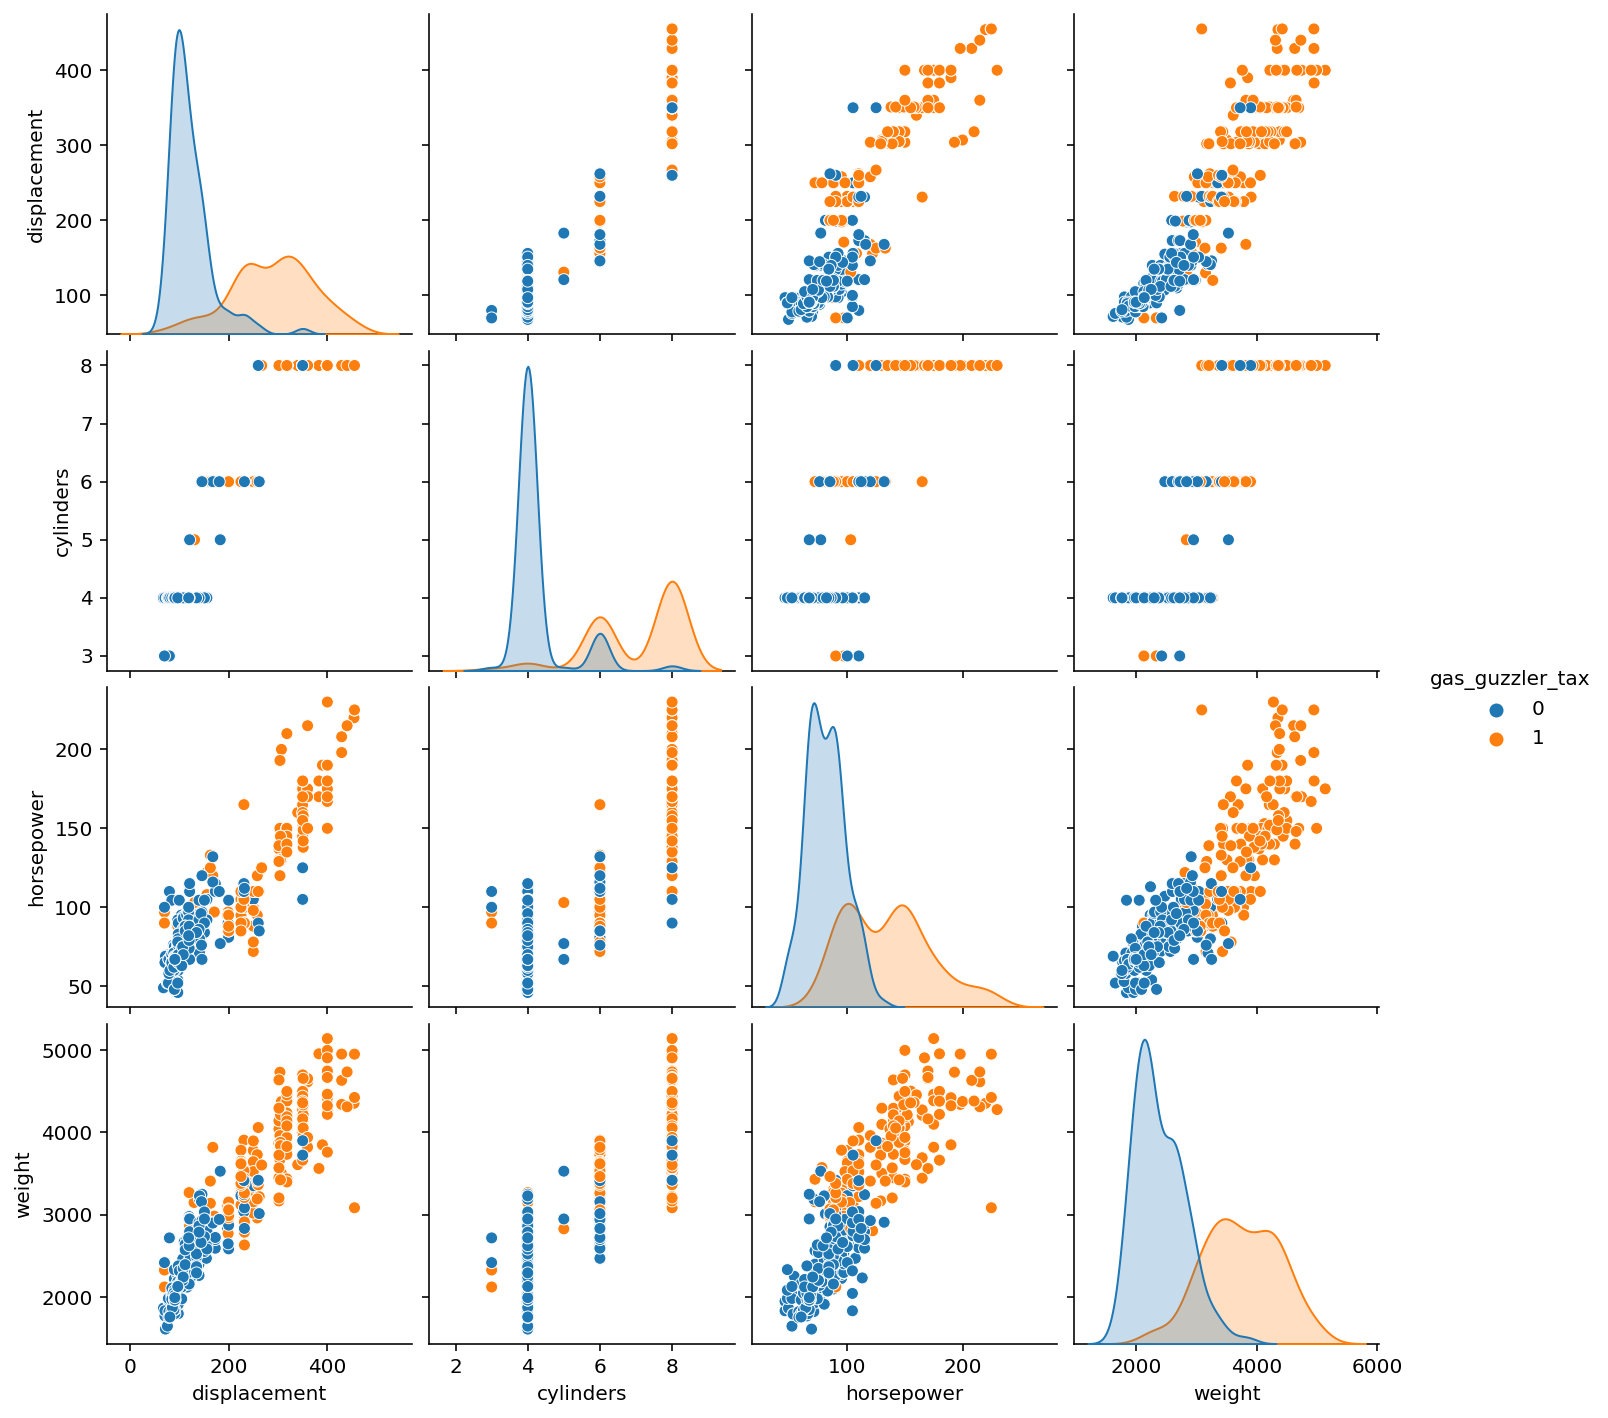

In [7]:
# Create a pairplot:
sns.pairplot(mpg[['displacement', 'cylinders', 'horsepower',
             'weight', 'gas_guzzler_tax']], hue='gas_guzzler_tax')

# Build a Model

## The Random Forest Model

In [8]:
# Separate the target variable:
y = mpg['gas_guzzler_tax']
X = mpg.drop(columns='gas_guzzler_tax')

# Split into train and test:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the model:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Test the model:
y_pred = rf_model.predict(X_test)

# Return the accuracy score:
rfAccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rfAccuracy)

Accuracy: 0.9375


## Assess Model Performance

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.88      0.97      0.92        30

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



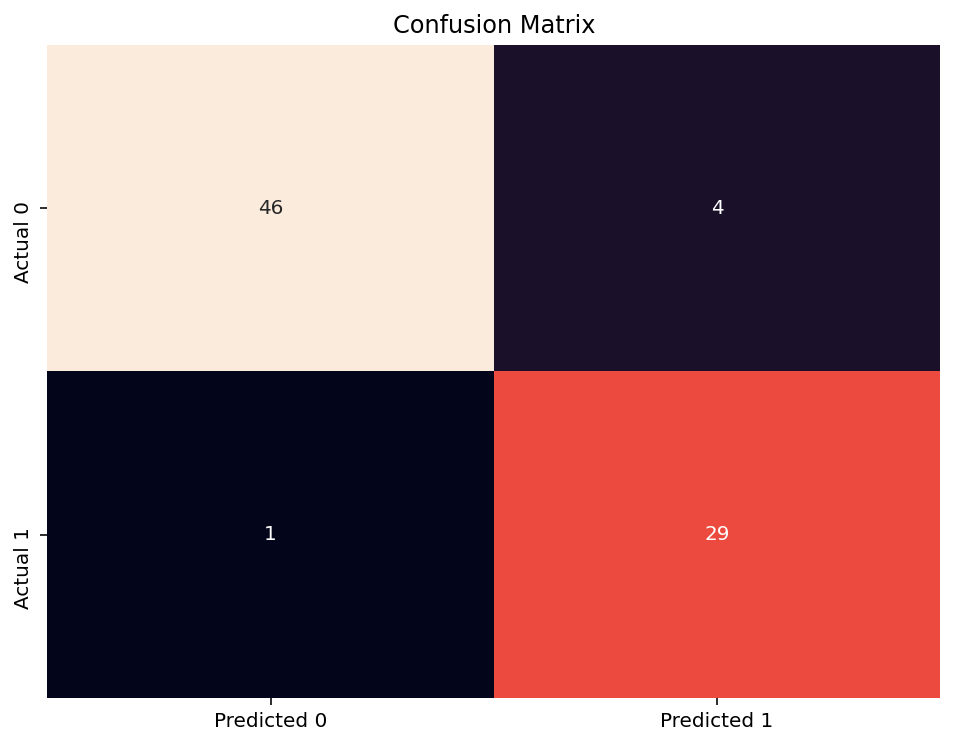

In [9]:
# Print classification report:
print('Classification Report:\n', classification_report(y_test, y_pred))

# Generate the plot:
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, cbar=False, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')

plt.show()

## Extract Feature Importances

In [10]:
# Get the feature importances:
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance = pd.DataFrame(
    {'Feature': X.columns, 'Importance': rf_feature_importance})
rf_feature_importance = rf_feature_importance.sort_values(
    by='Importance', ascending=False)

rf_feature_importance.head()

,Feature,Importance
0,displacement,0.281249
1,cylinders,0.246752
3,weight,0.206637
2,horsepower,0.102168
5,model_year,0.066608


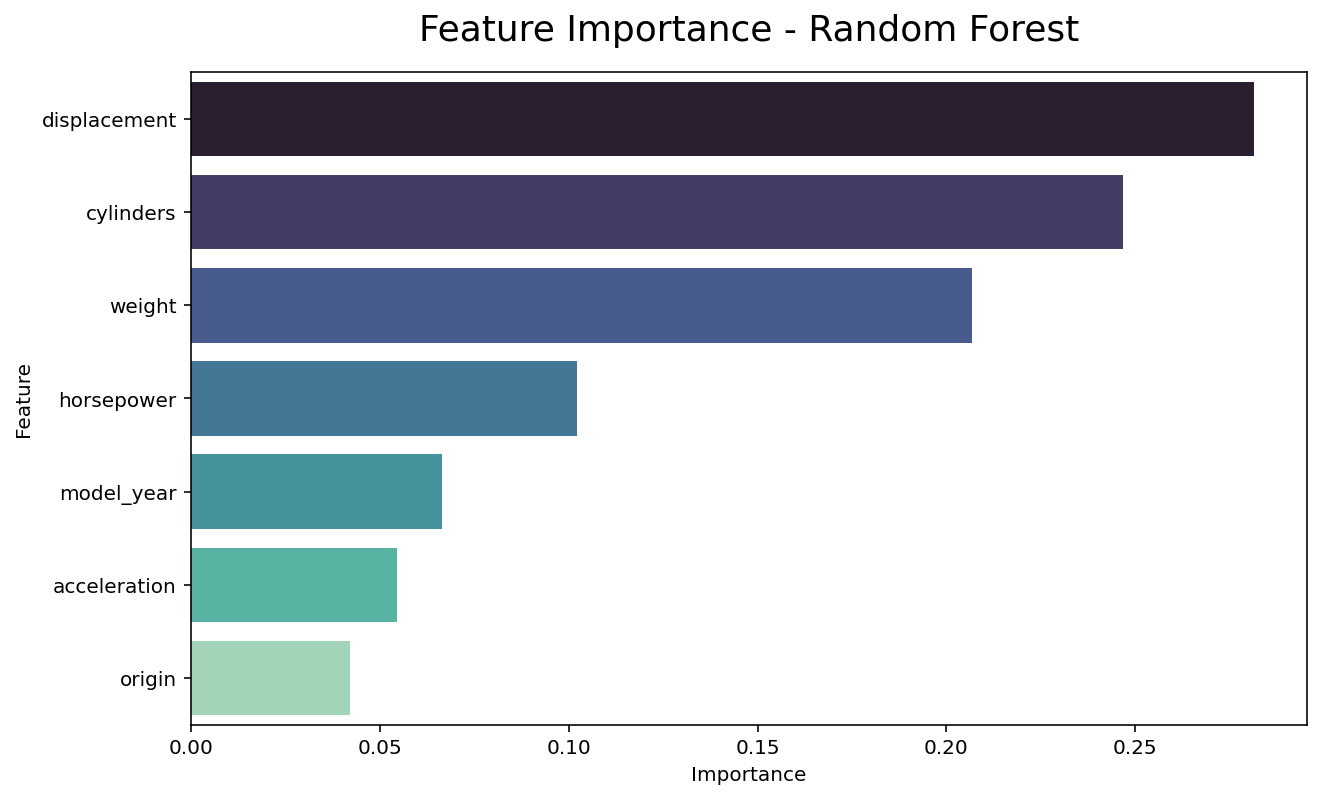

In [11]:
# Plot feature importance:

# Set plot size:
plt.figure(figsize=(10, 6))

# Feature importance:
sns.barplot(data=rf_feature_importance,
            x='Importance', y='Feature', palette='mako')

# Set labels:
plt.title('Feature Importance - Random Forest', fontsize=18, y=1.03)

plt.show()

# Test Prototype Cars

In [12]:
# Create car design dataframe:
car_designs = pd.DataFrame({
    'displacement': [305, 240, 240, 180],
    'cylinders': [8, 6, 6, 4],
    'horsepower': [225, 200, 190, 170],
    'weight': [3600, 3440, 3350, 3250],
    'acceleration': [7.1, 7.3, 7.6, 7.8],
    'model_year': [83, 83, 83, 83],
    'origin': [1, 1, 1, 1]
})

car_designs

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,305,8,225,3600,7.1,83,1
1,240,6,200,3440,7.3,83,1
2,240,6,190,3350,7.6,83,1
3,180,4,170,3250,7.8,83,1


In [13]:
# Make predictions on the new data points:
predictions = rf_model.predict(car_designs)

print(f'Predicted Class: {predictions}')

Predicted Class: [1 1 0 0]


## Input Your Own Values

In [14]:
# Get user input for each feature:
displacement = int(input("Enter displacement: "))
cylinders = int(input("Enter cylinders: "))
horsepower = int(input("Enter horsepower: "))
weight = int(input("Enter weight: "))
acceleration = float(input("Enter acceleration: "))
model_year = int(input("Enter model year: "))
origin = int(input("Enter origin: "))

# Create new data point for prediction:
car_design = pd.DataFrame({
    'displacement': [displacement],
    'cylinders': [cylinders],
    'horsepower': [horsepower],
    'weight': [weight],
    'acceleration': [acceleration],
    'model_year': [model_year],
    'origin': [origin]
})

# Make a prediction:
prediction = rf_model.predict(car_design)

print(f'Prediction: {prediction}')

Enter displacement: 240
Enter cylinders: 6
Enter horsepower: 200
Enter weight: 3400
Enter acceleration: 7.2
Enter model year: 83
Enter origin: 1
Prediction: [0]


## Additional Charts and Figures

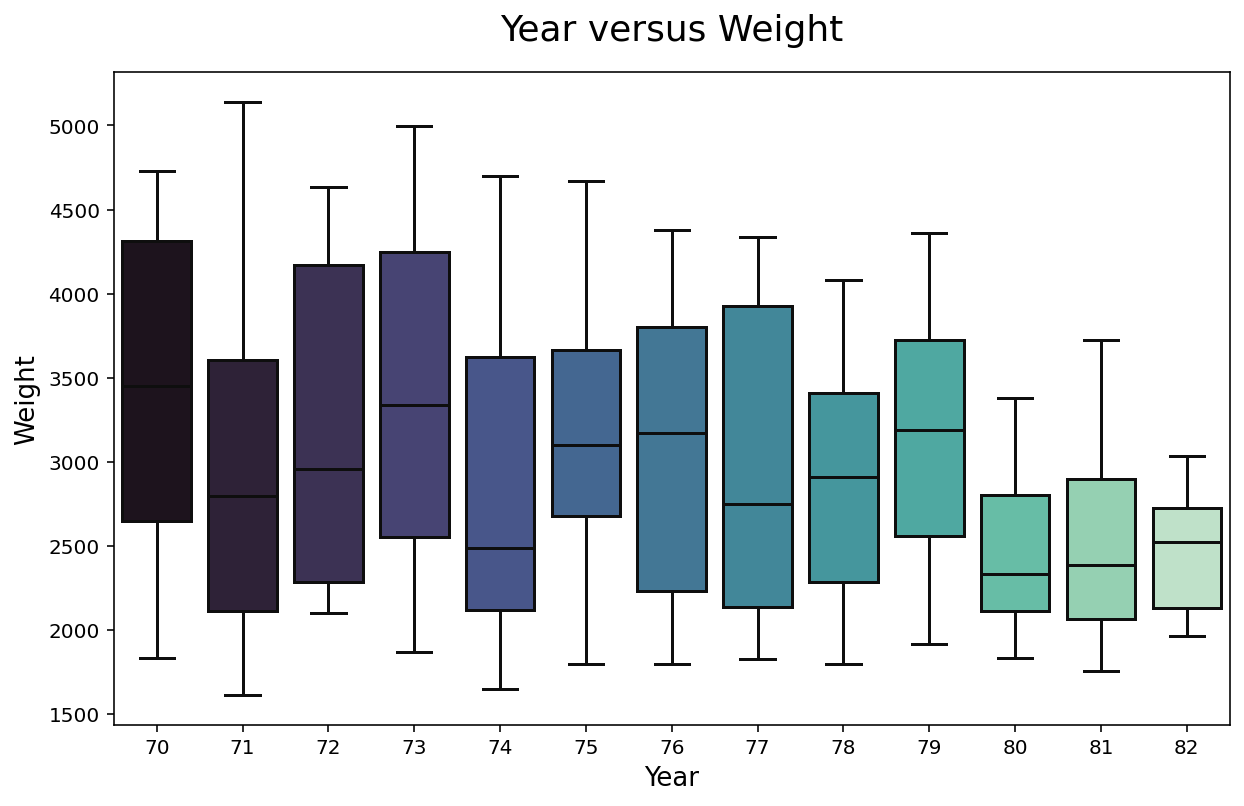

In [15]:
# Set plot size:
plt.figure(figsize=(10, 6))

# Create scatter plot:
sns.boxplot(data=mpg, x="model_year",
            y="weight", palette='mako')

# Set labels:
plt.title('Year versus Weight',
          fontsize=18, y=1.03)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Weight', fontsize=13)

plt.show()

***